Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:


import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [224]:
print(df.shape)
df.head()

(48818, 34)


bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0     1.5000         3  ...                 0                    0
1     1.0000         2  ...                 0                    0
2     1.0000         1  ...                 0                    0
3     1.0000         1  ...                 0                    0
4     1.0000         4  ...                 0                    0

[5 rows x 34 columns]

In [225]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
df['price'].describe()

count   48,818.0000
mean     3,579.5610
std      1,762.4209
min      1,375.0000
25%      2,500.0000
50%      3,150.0000
75%      4,095.0000
max     15,500.0000
Name: price, dtype: float64

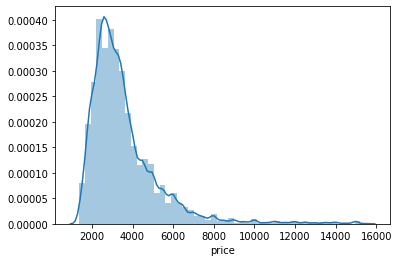

In [226]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['price']);

In [227]:
import plotly.express as px
px.scatter (df, x='longitude', y='price')

In [228]:
px.scatter(df, x ='latitude', y= 'price', trendline ='ols')

In [229]:
px.scatter(df, x ='bedrooms', y= 'price', trendline ='ols')

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [0]:
features = ['bedrooms']
target = 'price'
X_train = df[features]
y_train = df[target]

In [233]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
bedrooms = 2
X_test = [[bedrooms]]
y_pred = model.predict(X_test)
y_pred

array([3974.48248423])

In [235]:
model.coef_

array([853.25416753])

In [236]:
model.intercept_

2267.9741491780505

In [237]:
m = model.coef_[0]
b = model.intercept_

print('y = mx+b')
print(f'y={m:.4f}*x + {b:.4f}')
print(f'price = {m:.4f}*bedrooms + {b:.4f}')

y = mx+b
y=853.2542*x + 2267.9741
price = 853.2542*bedrooms + 2267.9741


In [238]:
def predict(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.4f} estimated rent of {bedrooms:,.0f} bedroom apartment in NYC.'
  explanation = f' In this linear regression, each additional bedroom moves price ${coefficient:,.4f}.'
  return result + explanation
predict(2)

'$3,974.4825 estimated rent of 2 bedroom apartment in NYC. In this linear regression, each additional bedroom moves price $853.2542.'

In [239]:
df['bedrooms'].describe()

count   48,818.0000
mean         1.5372
std          1.1061
min          0.0000
25%          1.0000
50%          1.0000
75%          2.0000
max          8.0000
Name: bedrooms, dtype: float64

In [240]:
from ipywidgets import interact
interact(predict, bedrooms = (0, 6));

interactive(children=(IntSlider(value=3, description='bedrooms', max=6), Output()), _dom_classes=('widget-inte…

### Multiple Regression with Longtitude and Latitude

In [0]:
model2 = LinearRegression()

In [0]:
features2 = ['longitude', 'latitude']
target2 = 'price'
X_train2 = df[features2]
y_train2 = df[target2]

In [243]:
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
longitude = -73.9777
latitude = 40.7551
X_test2 = [[longitude ,latitude]]
y_pred2 = model2.predict(X_test2)
y_pred2

array([3670.5957796])

In [245]:
model2.coef_

array([-16356.12226422,   2347.99312608])

In [246]:
model2.intercept_

-1302010.4048994102

In [247]:
m2 = model2.coef_[0]
l2 = model2.coef_[1]
b2 = model2.intercept_

print('y = lz+mx+b')
print(f'y = {l2:.4f}*z + {m2:.4f}*x + {b2:.4f}')
print(f'price = {l2:.4f}*latitude + {m2:.4f}*longitude + {b2:.4f}')

y = lz+mx+b
y = 2347.9931*z + -16356.1223*x + -1302010.4049
price = 2347.9931*latitude + -16356.1223*longitude + -1302010.4049


In [248]:
def predict(longitude,latitude):
  y_pred2 = model2.predict([[longitude,latitude]])
  estimate2 = y_pred2[0]
 
  result = f'${estimate2:,.4f} estimated rent on {longitude:,.4f} longitude and {latitude:,.4f} latitude in NYC.'
  explanation1 = f' In this linear regression, change of 1 degree in longitude moves price ${m2:,.4f}.'
  explanation2 = f' Change of 1 degree in latitude moves price ${l2:,.4f}.'
  return result + explanation1 + explanation2
predict(-73.9777, 40.7551)

'$3,670.5958 estimated rent on -73.9777 longitude and 40.7551 latitude in NYC. In this linear regression, change of 1 degree in longitude moves price $-16,356.1223. Change of 1 degree in latitude moves price $2,347.9931.'

### Add Bedrooms to above regression

In [0]:
model3 = LinearRegression()

In [0]:
features3 = ['longitude', 'latitude', 'bedrooms']
target3 = 'price'
X_train3 = df[features3]
y_train3 = df[target3]

In [251]:
model3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
longitude = -73.9777
latitude = 40.7551
bedrooms = 2
X_test3 = [[longitude ,latitude, bedrooms]]
y_pred3 = model3.predict(X_test3)
y_pred3

array([4089.48348344])

In [253]:
model3.coef_

array([-18394.98636194,   2758.74848212,    879.40884148])

In [254]:
model3.intercept_

-1470921.1870513426

In [255]:
m3 = model3.coef_[0]
l3 = model3.coef_[1]
n3 = model3.coef_[2]
b3 = model3.intercept_

print('y = nw+lz+mx+b')
print(f'y = {n3:.4f}*w + {l3:.4f}*z + {m3:.4f}*x + {b3:.4f}')
print(f'price = {n3:.4f}*bedrooms + {l3:.4f}*latitude + {m3:.4f}*longitude + {b3:.4f}')

y = nw+lz+mx+b
y = 879.4088*w + 2758.7485*z + -18394.9864*x + -1470921.1871
price = 879.4088*bedrooms + 2758.7485*latitude + -18394.9864*longitude + -1470921.1871


In [256]:
def predict(longitude,latitude, bedrooms):
  y_pred3 = model3.predict([[longitude, latitude, bedrooms]])
  estimate3 = y_pred3[0]
 
  result = f'${estimate3:,.4f} estimated rent of {bedrooms:,.0f} bedroom apartment on {longitude:,.4f} longitude and {latitude:,.4f} latitude in NYC.'
  explanation1 = f' In this linear regression, change of 1 degree in longitude moves price ${m3:,.4f}.'
  explanation2 = f' Change of 1 degree in latitude moves price ${l3:,.4f}.'
  explanation3 = f' Each additional bedroom moves price ${n3:,.0f}'
  return result + explanation1 + explanation2 + explanation3
predict(-73.9777, 40.7551, 2)

'$4,089.4835 estimated rent of 2 bedroom apartment on -73.9777 longitude and 40.7551 latitude in NYC. In this linear regression, change of 1 degree in longitude moves price $-18,394.9864. Change of 1 degree in latitude moves price $2,758.7485. Each additional bedroom moves price $879'

In [257]:
from ipywidgets import interact
interact(predict, latitude = (40.6 , 40.9), longitude = (-74.05, -73.8),  bedrooms = (0, 6));

interactive(children=(FloatSlider(value=-73.925, description='longitude', max=-73.8, min=-74.05), FloatSlider(…